# Sieve of Eratosthenes
Just a fun little project to reproduce the visual created on Wikipedia on the page for Sieve of Eratosthenes. Hurricane Ian knocked out my roommate and I's internet, so we worked on separate versions of this to pass the time. 
![Sieve](https://upload.wikimedia.org/wikipedia/commons/b/b9/Sieve_of_Eratosthenes_animation.gif)
Some future improvements might include adding the text on the right, letting the user change the top range of the sieve, changing colors, or even displaying this with a different format (circles, or spirals, etc.)

## Initial Method, No Animation

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

In [3]:
import time

In [4]:
color_list = ['red', 'green', 'blue', 'yellow', 'purple']

In [5]:
top_range = 120

In [6]:
list_of_numbers = list(range(2, top_range + 1))

In [7]:
number_tracker = {number: 'gray' for number in list_of_numbers}

In [8]:
y_list = []
for y in range(1, 12+1): # orig 10
    for repeat in range(10): # orig 12
        y_list.append(y)

In [9]:
x_list = list(range(1,10+1)) * 12 # orig 12,10

In [10]:
def plot_from_dict(tracker):
    clear_output()
    z = list(tracker.values())
    z.insert(0,'gray')
    fig, ax = plt.subplots()
    ax.scatter(x_list, y_list, c = z, marker = 's', s = 375, alpha = .7)
    ax.invert_yaxis()
    #ax.set_yticks(list(range(1,10+1)))
    ax.set_yticks([])
    # ax.set_xticks(list(range(1,12+1)))
    ax.set_xticks([])
    ax.axis('off')
    for x, y, label in zip(x_list, y_list, list(range(1, top_range + 1))):
        ax.annotate(text = label, xy= (x,y), ha = 'center', va = 'center')
    #plt.show()
    #time.sleep(.3)

In [11]:
from IPython.display import clear_output

In [12]:
#plot_from_dict(number_tracker)
for number in list_of_numbers:
    if number_tracker[number] == 'gray':
        try:
            color_of_interest = color_list.pop(0)
        except IndexError:
            color_of_interest = 'purple'
        number_tracker[number] = color_of_interest # make this darker, somehow?
        #plot_from_dict(number_tracker)
        for subnumber in [x for x in list_of_numbers if x > number]:
            if subnumber % number == 0 and number_tracker[subnumber] == 'gray':
                number_tracker[subnumber] = color_of_interest
                #clear_output()
                #plot_from_dict(number_tracker)

In [13]:
# for number in number list:
# if number is divisble, skip.
# if number is not divisible, turn to a new color, 
#    then go through and find all numbers divisible by current number to change

# 12 rows
# 10 columns

## Matplotlib Animation

In [14]:
import matplotlib.pyplot as plt

In [15]:
y_list = []
for y in range(1, 12+1): # orig 10
    for repeat in range(10): # orig 12
        y_list.append(y)

In [16]:
x_list = list(range(1,10+1)) * 12

In [17]:
from matplotlib import animation
import copy

In [18]:
top_range = 120
list_of_numbers = list(range(2, top_range + 1))

In [19]:
number_tracker = {number: 'gray' for number in list_of_numbers}

In [20]:
list_of_trackers = [copy.deepcopy(number_tracker)]

In [21]:
color_list = ['red', 'green', 'blue', 'yellow', 'purple']

In [22]:
# plot_from_dict(number_tracker)
for number in list_of_numbers:
    if number_tracker[number] == 'gray':
        try:
            color_of_interest = color_list.pop(0)
        except IndexError:
            color_of_interest = 'purple'
        number_tracker[number] = color_of_interest # make this darker, somehow?
        list_of_trackers.append(copy.deepcopy(number_tracker)) # plot_from_dict(number_tracker)
        # print('number insertion', number) - debug
        for subnumber in [x for x in list_of_numbers if x > number]:
            if subnumber % number == 0 and number_tracker[subnumber] == 'gray':
                number_tracker[subnumber] = color_of_interest
                #clear_output() - debug
                #plot_from_dict(number_tracker) - debug
                # print('subnumber insertion:', number) - debug
                list_of_trackers.append(number_tracker.copy())

In [23]:
frames = len(list_of_trackers)

In [24]:
def plot_from_dict(num):
    ax.clear()
    tracker = list_of_trackers[num]
    z = list(tracker.values())
    z.insert(0,'gray')
    # fig, ax = plt.subplots()
    ax.scatter(x_list, y_list, c = z, marker = 's', s = 375, alpha = .7)
    ax.invert_yaxis()
    #ax.set_yticks(list(range(1,10+1)))
    ax.set_yticks([])
    # ax.set_xticks(list(range(1,12+1)))
    ax.set_xticks([])
    ax.axis('off')
    for x, y, label in zip(x_list, y_list, list(range(1, top_range + 1))):
        ax.annotate(text = label, xy= (x,y), ha = 'center', va = 'center')
    plt.show()
    #time.sleep(.3)

<IPython.core.display.Javascript object>


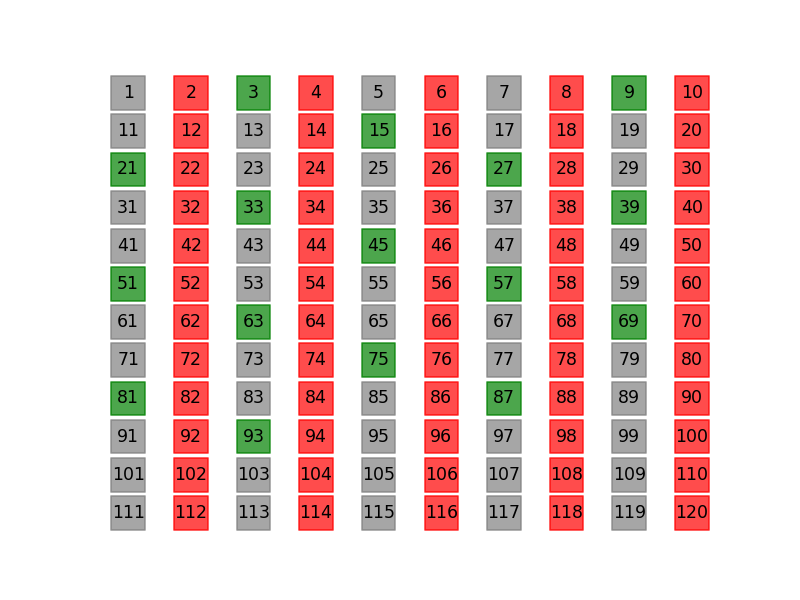

In [25]:
fig = plt.figure()
ax = plt.axes()
line_ani = animation.FuncAnimation(fig, plot_from_dict, interval=150,
                                   frames=frames)

In [26]:
line_ani.save('Sieve of Eratosthenes.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
